<a href="https://colab.research.google.com/github/jansoe/dl_workshop/blob/main/Super_Basic_Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# A simple Artifical Neural Network

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt

## The Data


Our toy data: The MNIST dastaset (handwritten digit recognition)

In [ ]:
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# scaling the pixel values to the range (-1, 1) 
train_images = (train_images/255 - 0.5) * 2
test_images = (test_images/255 - 0.5) * 2

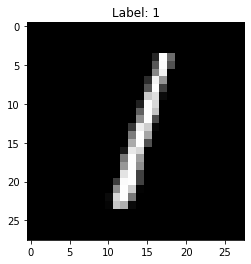

In [ ]:
_ = plt.imshow(test_images[2], cmap=plt.cm.gray)
_ = plt.title('Label: %s'%test_labels[2])

In [ ]:
train_images.shape

(60000, 28, 28)

The training data conatins 60.000 samples of handwritten digits. 
The data is inherently 2D (28x28 pixel).

For our first network we will create now a simple 1D-Vector by flattening the images and thus discarding the 2D neighbourhood structure.

In [ ]:
train_images_flat = train_images.reshape((-1, 28*28))
test_images_flat = test_images.reshape((-1, 28*28))

train_images_flat.shape

(60000, 784)

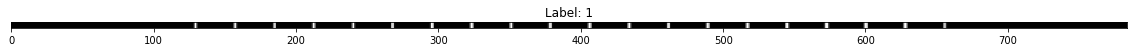

In [ ]:
plt.figure(figsize=(20,0.1))
_ = plt.imshow(test_images_flat[2].reshape(1, -1), cmap=plt.cm.gray, aspect='auto')
_ = plt.title('Label: %s'%test_labels[2])
_ = plt.yticks([])

## The most simple Network 

All features (pixel values) are mapped to probabilities for all 10 labels



In [ ]:
# A Dense Layer ist an all-to-all conection of input and output neurons
out_layer = tf.keras.layers.Dense(
    input_shape=(784,),             
    units=10,                      # output: 10 units for 10 categories
    activation='softmax',          # softmax-activation, so that probabilities sum up to 1
    name = 'probabilities'
)

In [ ]:
model1 = tf.keras.models.Sequential()
model1.add(out_layer)

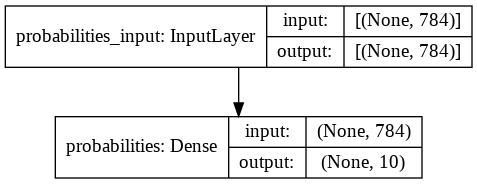

In [ ]:
tf.keras.utils.plot_model(model1, show_shapes=True)

In [ ]:
model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
probabilities (Dense)        (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


For training the model we need to specify the loss to minimize, and the procedure to do this.

For our case of `multiclass-classification` we can use the loss of `categorical_crossentropy`, which measures how many bits of uncertainty are left to obtain the true labels given our prediction.

We use **sparse**`_categorical_crossentropy` because our labels are encoded sparse i.e. as integers 0,1,..,9 and not as binary **one-hot** labels: (1,0,0,0,0,0,0,0,0,0,0), (0,1,0,0,0,0,0,0,0,0,0), ...,  (0,0,0,0,0,0,0,0,0,0,1)

In [ ]:
model1.compile(
    loss = 'sparse_categorical_crossentropy', 
    optimizer = 'SGD',      # optimization procdure
    metrics = ['accuracy']  # Monitoring training
)

Now we can fit our data to the model

In [ ]:
history = model1.fit(
    x = train_images_flat, 
    y = train_labels,
    batch_size = 16,
    validation_data = (test_images_flat, test_labels),
    epochs = 20  # one epoche is one sweep through the training data
)

Epoch 1/20
3750/3750 [==============================] - 6s 2ms/step - loss: 0.6448 - accuracy: 0.8075 - val_loss: 0.3225 - val_accuracy: 0.9085
Epoch 2/20
3750/3750 [==============================] - 6s 2ms/step - loss: 0.3331 - accuracy: 0.9022 - val_loss: 0.3094 - val_accuracy: 0.9120
Epoch 3/20
3750/3750 [==============================] - 6s 2ms/step - loss: 0.3130 - accuracy: 0.9088 - val_loss: 0.3154 - val_accuracy: 0.9080
Epoch 4/20
3750/3750 [==============================] - 6s 2ms/step - loss: 0.3046 - accuracy: 0.9120 - val_loss: 0.2901 - val_accuracy: 0.9182
Epoch 5/20
3750/3750 [==============================] - 6s 2ms/step - loss: 0.2966 - accuracy: 0.9156 - val_loss: 0.2825 - val_accuracy: 0.9200
Epoch 6/20
3750/3750 [==============================] - 6s 2ms/step - loss: 0.2857 - accuracy: 0.9186 - val_loss: 0.2880 - val_accuracy: 0.9166
Epoch 7/20
3750/3750 [==============================] - 6s 2ms/step - loss: 0.2892 - accuracy: 0.9177 - val_loss: 0.2856 - val_accuracy:

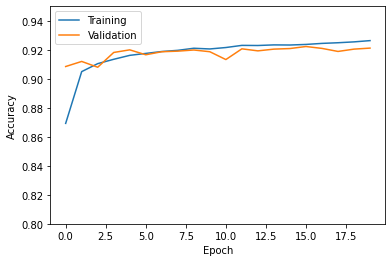

In [ ]:
plt.plot(history.history['accuracy'], label='Training')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.ylim([.8, .95])
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

## Getting Deeper  

Additional `hidden layers` increase complexity and thus expressiveness of the network.

In [ ]:
hidden_layer = tf.keras.layers.Dense( 
    input_shape = (28*28,), 
    units=200,            # 200 units als intermediate-output
    activation = 'relu',  # one of the most popular activation functions 
    name = 'hidden'
) 

In [ ]:
# unser outputlayer wie oben
out_layer = tf.keras.layers.Dense( 
    units=10,                      
    activation='softmax',  
    name= 'out'
)

In [ ]:
model2 = tf.keras.models.Sequential()

model2.add(hidden_layer)
model2.add(out_layer)

model2.compile(
    loss = 'sparse_categorical_crossentropy',  # Klassifizierungsfehler
    metrics = ['accuracy'],  # Anteil korrekt klassifizierter Samples des Validierungsdatensatzes
)

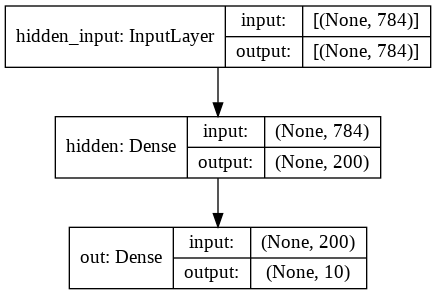

In [ ]:
tf.keras.utils.plot_model(model2, show_shapes=True)

In [ ]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden (Dense)               (None, 200)               157000    
_________________________________________________________________
out (Dense)                  (None, 10)                2010      
Total params: 159,010
Trainable params: 159,010
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model2.fit(
    x = train_images_flat, 
    y = train_labels,
    validation_data = (test_images_flat, test_labels),
    epochs = 20
)

Epoch 1/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5228 - accuracy: 0.8399 - val_loss: 0.1571 - val_accuracy: 0.9520
Epoch 2/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1706 - accuracy: 0.9484 - val_loss: 0.1401 - val_accuracy: 0.9616
Epoch 3/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1295 - accuracy: 0.9634 - val_loss: 0.2003 - val_accuracy: 0.9482
Epoch 4/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1109 - accuracy: 0.9693 - val_loss: 0.1242 - val_accuracy: 0.9665
Epoch 5/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0984 - accuracy: 0.9711 - val_loss: 0.1556 - val_accuracy: 0.9611
Epoch 6/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0891 - accuracy: 0.9761 - val_loss: 0.1292 - val_accuracy: 0.9710
Epoch 7/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0848 - accuracy: 0.9769 - val_loss: 0.1389 - val_accuracy:


### Experiments Suggestions
Observe the train and validation error 
- in/decrease the number of neurons in the `hidden layer` (getting wider)
- with a second `hidden layer 2` (getting deeper) 


## Convolutional Neural Networks (CNN)


![Förderprogramm LINK der Stiftung Niedersachsen - Aufgabensammlung 1](https://raw.githubusercontent.com/vdumoulin/conv_arithmetic/master/gif/padding_strides.gif) https://github.com/vdumoulin/conv_arithmetic

Convolutional Neural Networks reflect the inherent 2D-structure of images.

Every convolution filter "looks" for a specific local feature in across the image 

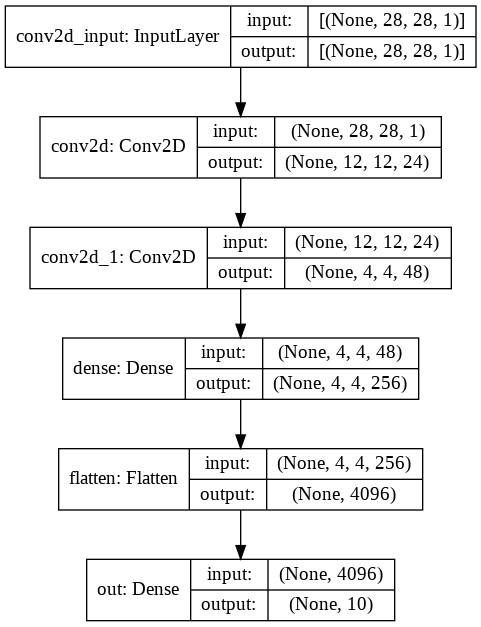

In [ ]:
input_layer = tf.keras.layers.Conv2D(
    input_shape = (28, 28, 1),    # our input shape (1 colour channel)
    filters = 24,                 # how many filter/feature we want to learn
    kernel_size = (5,5),          # filtersize
    activation= 'relu',
    strides=2
)

hidden_convolution = tf.keras.layers.Conv2D(
    filters = 48,                  
    kernel_size = (5,5),
    activation= 'relu',
    strides=2
)

flatten_layer = tf.keras.layers.Flatten()

intermediate_layer = tf.keras.layers.Dense( 
    units = 256,
    activation = 'relu',
)

out_layer = tf.keras.layers.Dense( 
    units=10,                     
    activation='softmax',           
    name = 'out'
)


model3 = tf.keras.models.Sequential()
model3.add(input_layer)
model3.add(hidden_convolution)
model3.add(intermediate_layer)
model3.add(flatten_layer)
model3.add(out_layer)

model3.compile(
    loss = 'sparse_categorical_crossentropy',
    # a more sophisticated optimizer than SGD
    optimizer = tf.keras.optimizers.Adam(learning_rate=1E-4), 
    metrics = ['accuracy'],                    
)

tf.keras.utils.plot_model(model3, show_shapes=True)
model3.summary()

A `Conv2D`-layer works on 2D data with multiple channels. In our case (MNIST) we have only one color channel (grey) which we need to explicitly add in the data 


In [ ]:
train_images_ch = train_images.reshape(-1, 28, 28, 1)
test_images_ch = test_images.reshape(-1, 28, 28, 1)

now we can train the model



In [ ]:
history = model3.fit(
    x = train_images_ch, 
    y = train_labels,
    validation_data = (test_images_ch, test_labels),
    epochs = 20
)

Epoch 1/20
1875/1875 [==============================] - 10s 3ms/step - loss: 0.7898 - accuracy: 0.7812 - val_loss: 0.1458 - val_accuracy: 0.9559
Epoch 2/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1363 - accuracy: 0.9602 - val_loss: 0.0818 - val_accuracy: 0.9742
Epoch 3/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0862 - accuracy: 0.9744 - val_loss: 0.0649 - val_accuracy: 0.9784
Epoch 4/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0666 - accuracy: 0.9799 - val_loss: 0.0562 - val_accuracy: 0.9818
Epoch 5/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0568 - accuracy: 0.9828 - val_loss: 0.0478 - val_accuracy: 0.9834
Epoch 6/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0481 - accuracy: 0.9850 - val_loss: 0.0442 - val_accuracy: 0.9860
Epoch 7/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0426 - accuracy: 0.9878 - val_loss: 0.0365 - val_accuracy

### Data Augmentation

Techniques to close the gap between train and validation error are called  `regularization`.

Increasing the available train data is the most straight-forward way, but it is often hard to obtain this data. One simple way to increase the available data is to create slightly modified versions of every train image (augmentation). 

In [ ]:
from tensorflow.keras.layers.experimental import preprocessing

In [ ]:
data_augmentation = tf.keras.Sequential([
  preprocessing.RandomRotation(0.05),
  preprocessing.RandomTranslation(height_factor=0.02, width_factor=0.02),
  preprocessing.RandomZoom(height_factor=0.02, width_factor=0.02),
])

In [ ]:
train_dataset = tf.data.Dataset.from_tensor_slices((train_images, train_labels))
train_dataset = train_dataset.shuffle(1024).batch(64)
train_dataset = train_dataset.map(lambda x, y: (data_augmentation(x, training=True), y), num_parallel_calls=tf.data.experimental.AUTOTUNE)

In [ ]:
model3.fit(
    train_dataset,
    validation_data = (test_images, test_labels),
    epochs = 20 
)

Epoch 1/20
938/938 [==============================] - 7s 7ms/step - loss: 0.0492 - accuracy: 0.9841 - val_loss: 0.0377 - val_accuracy: 0.9885
Epoch 2/20
938/938 [==============================] - 7s 7ms/step - loss: 0.0427 - accuracy: 0.9863 - val_loss: 0.0327 - val_accuracy: 0.9897
Epoch 3/20
938/938 [==============================] - 7s 8ms/step - loss: 0.0388 - accuracy: 0.9874 - val_loss: 0.0299 - val_accuracy: 0.9903
Epoch 4/20
938/938 [==============================] - 7s 8ms/step - loss: 0.0401 - accuracy: 0.9874 - val_loss: 0.0294 - val_accuracy: 0.9908
Epoch 5/20
938/938 [==============================] - 7s 7ms/step - loss: 0.0354 - accuracy: 0.9886 - val_loss: 0.0337 - val_accuracy: 0.9900
Epoch 6/20
938/938 [==============================] - 7s 7ms/step - loss: 0.0341 - accuracy: 0.9893 - val_loss: 0.0290 - val_accuracy: 0.9907
Epoch 7/20
938/938 [==============================] - 7s 8ms/step - loss: 0.0341 - accuracy: 0.9889 - val_loss: 0.0297 - val_accuracy: 0.9910
Epoch 

### Decreasing the learning rate at the end of training

In [ ]:
model3.compile(
    loss = 'sparse_categorical_crossentropy',
    # a more sophisticated optimizer than SGD
    optimizer = tf.keras.optimizers.Adam(learning_rate=1E-5), 
    metrics = ['accuracy'],                    
)

model3.fit(
    train_dataset,
    validation_data = (test_images, test_labels),
    epochs = 20 
)

Epoch 1/20
938/938 [==============================] - 7s 7ms/step - loss: 0.0207 - accuracy: 0.9936 - val_loss: 0.0248 - val_accuracy: 0.9929
Epoch 2/20
938/938 [==============================] - 6s 7ms/step - loss: 0.0210 - accuracy: 0.9936 - val_loss: 0.0251 - val_accuracy: 0.9927
Epoch 3/20
938/938 [==============================] - 6s 7ms/step - loss: 0.0185 - accuracy: 0.9942 - val_loss: 0.0245 - val_accuracy: 0.9931
Epoch 4/20
938/938 [==============================] - 6s 7ms/step - loss: 0.0180 - accuracy: 0.9944 - val_loss: 0.0248 - val_accuracy: 0.9931
Epoch 5/20
938/938 [==============================] - 6s 7ms/step - loss: 0.0182 - accuracy: 0.9944 - val_loss: 0.0241 - val_accuracy: 0.9930
Epoch 6/20
938/938 [==============================] - 7s 7ms/step - loss: 0.0199 - accuracy: 0.9939 - val_loss: 0.0242 - val_accuracy: 0.9934
Epoch 7/20
938/938 [==============================] - 7s 7ms/step - loss: 0.0190 - accuracy: 0.9943 - val_loss: 0.0253 - val_accuracy: 0.9924
Epoch 

### Learning Rate Scheduling

In [ ]:
input_layer = tf.keras.layers.Conv2D(
    input_shape = (28, 28, 1),    # our input shape (1 colour channel)
    filters = 24,                 # how many filter/feature we want to learn
    kernel_size = (5,5),          # filtersize
    activation= 'relu',
    strides=2
)

hidden_convolution = tf.keras.layers.Conv2D(
    filters = 48,                  
    kernel_size = (5,5),
    activation= 'relu',
    strides=2
)

flatten_layer = tf.keras.layers.Flatten()

intermediate_layer = tf.keras.layers.Dense( 
    units = 256,
    activation = 'relu',
)

out_layer = tf.keras.layers.Dense( 
    units=10,                     
    activation='softmax',           
    name = 'out'
)


model4 = tf.keras.models.Sequential()
model4.add(input_layer)
model4.add(hidden_convolution)
model4.add(intermediate_layer)
model4.add(flatten_layer)
model4.add(out_layer)


In [ ]:
learning_rate_schedule = tf.keras.optimizers.schedules.PolynomialDecay(    
    initial_learning_rate = 1E-4,
    decay_steps = 30
)

model4.compile(
    loss = 'sparse_categorical_crossentropy',
    # a more sophisticated optimizer than SGD
    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate_schedule), 
    metrics = ['accuracy'],                    
)

model4.fit(
    train_dataset,
    validation_data = (test_images, test_labels),
    epochs = 30
)

Epoch 1/30
938/938 [==============================] - 7s 7ms/step - loss: 1.1100 - accuracy: 0.6798 - val_loss: 0.1798 - val_accuracy: 0.9470
Epoch 2/30
938/938 [==============================] - 7s 7ms/step - loss: 0.2320 - accuracy: 0.9305 - val_loss: 0.1021 - val_accuracy: 0.9698
Epoch 3/30
938/938 [==============================] - 7s 7ms/step - loss: 0.1485 - accuracy: 0.9552 - val_loss: 0.0786 - val_accuracy: 0.9759
Epoch 4/30
938/938 [==============================] - 6s 7ms/step - loss: 0.1189 - accuracy: 0.9639 - val_loss: 0.0724 - val_accuracy: 0.9754
Epoch 5/30
938/938 [==============================] - 6s 7ms/step - loss: 0.1054 - accuracy: 0.9674 - val_loss: 0.0660 - val_accuracy: 0.9783
Epoch 6/30
938/938 [==============================] - 7s 7ms/step - loss: 0.0912 - accuracy: 0.9724 - val_loss: 0.0567 - val_accuracy: 0.9804
Epoch 7/30
938/938 [==============================] - 7s 7ms/step - loss: 0.0833 - accuracy: 0.9752 - val_loss: 0.0545 - val_accuracy: 0.9807
Epoch 

## Precompiled networks

In [ ]:
from tensorflow.keras.applications import efficientnet

model = efficientnet.EfficientNetB7(weights='imagenet')

268328960/268326632 [==============================] - 3s 0us/step


dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.363001 to fit



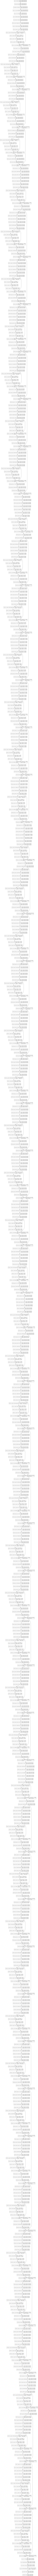

In [ ]:
tf.keras.utils.plot_model(model, show_shapes=True)

In [ ]:
model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 225, 225, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
_______________________________________________________________________________